In [724]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

SEED = 42
np.random.seed(SEED)

plt.style.use('bmh')
sns.set_context('notebook')
set_matplotlib_formats('retina')
warnings.filterwarnings('ignore')

In [725]:
dataset_path = 'spaceship-titanic/'
import os
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

spaceship-titanic/test.csv
spaceship-titanic/train.csv


In [726]:
train_df = pd.read_csv(dataset_path + 'train.csv')
test_df = pd.read_csv(dataset_path + 'test.csv')
print(f'Train: {train_df.shape}, Test: {test_df.shape}')

Train: (8693, 14), Test: (4277, 13)


In [727]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [728]:
def info(df):
    info_df = {
        'dtype': df.dtypes,
        'nunique': df.nunique(),
        'nulls': df.isna().sum(axis=0)
    }
    return pd.DataFrame(info_df)

def nulls_df(train_df, test_df):
    return pd.DataFrame(
        columns=['Train Nulls', 'Test Nulls'], 
        data=zip(train_df.drop('Transported', axis=1).isna().sum(axis=0), test_df.isna().sum(axis=0)),
        index=test_df.columns
    )

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [729]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df[spending_cols] = train_df[spending_cols].fillna(0)
train_df['TotalBill'] = train_df[spending_cols].sum(axis=1)

test_df[spending_cols] = test_df[spending_cols].fillna(0)
test_df['TotalBill'] = test_df[spending_cols].sum(axis=1)

nulls_df(train_df, test_df).loc[spending_cols].T

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Train Nulls,0,0,0,0,0
Test Nulls,0,0,0,0,0


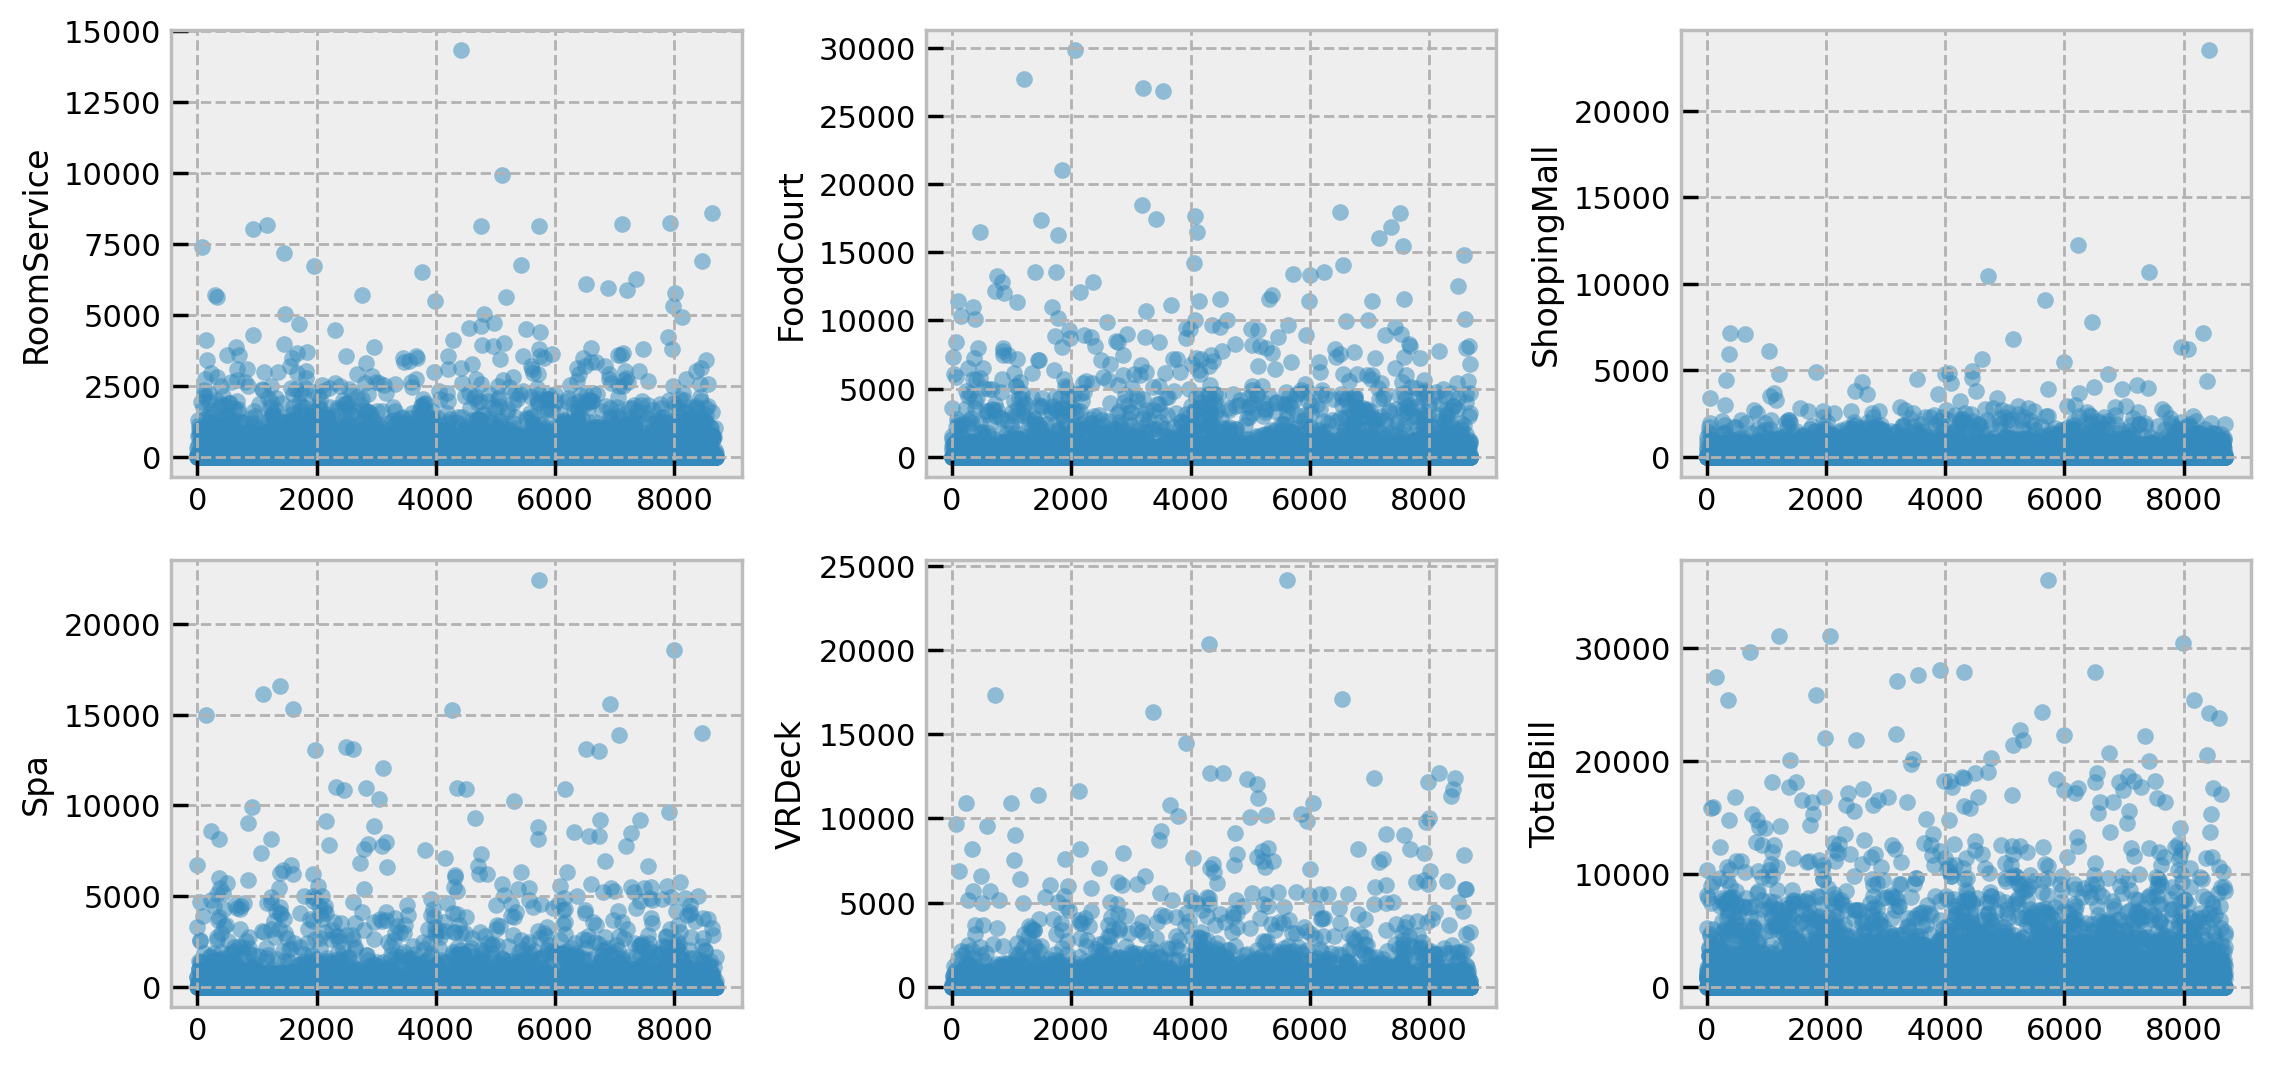

In [730]:
cols_for_plot = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalBill']
fig, axes = plt.subplots(2, 3, figsize=(11.5, 5.5))
for ax, col in zip(axes.flatten(), cols_for_plot):
    sns.scatterplot(ax=ax, data=train_df[col], linewidth=0, alpha=0.5)

plt.tight_layout()
plt.show()

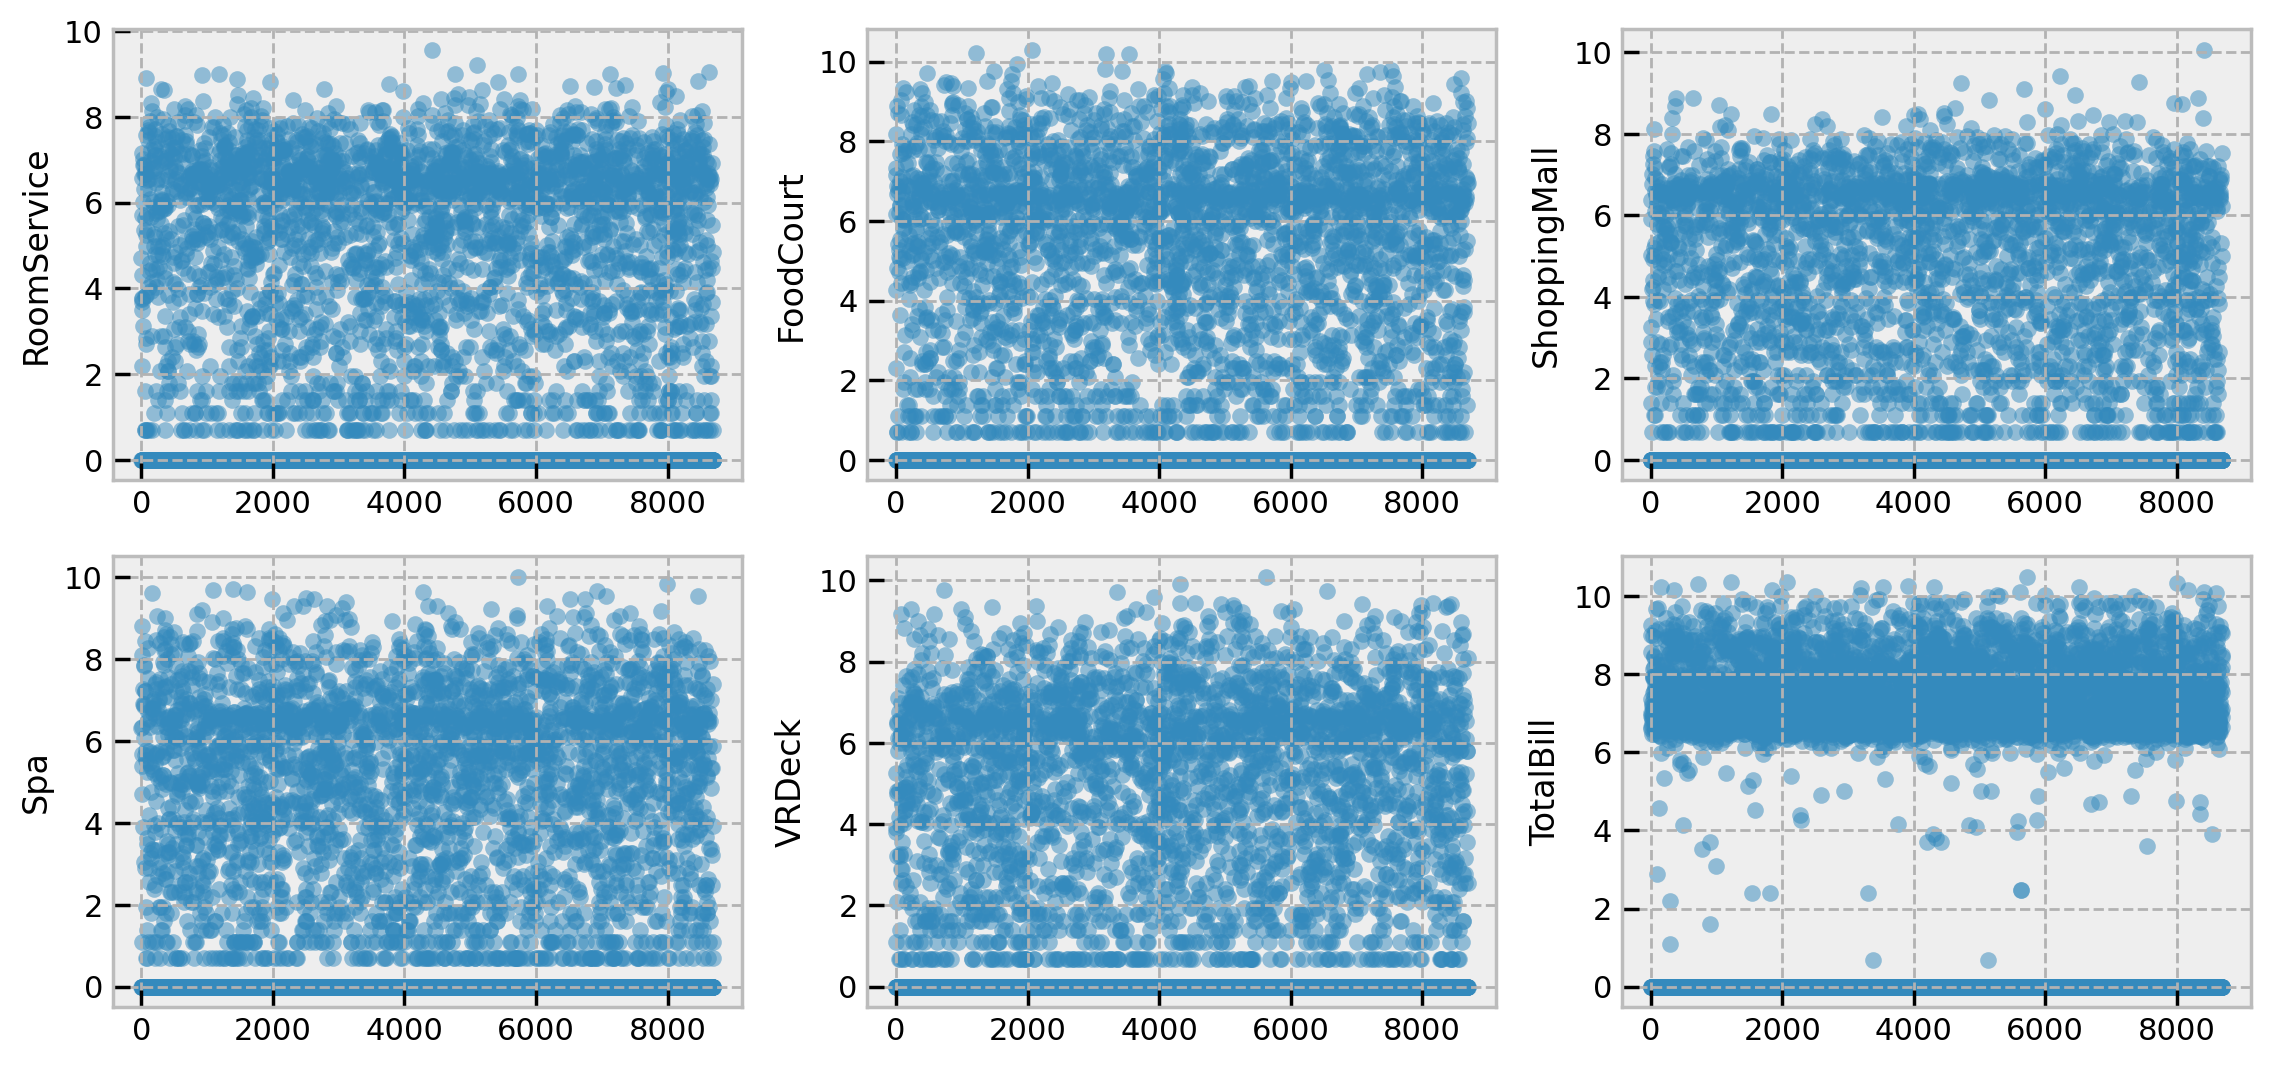

In [731]:
train_df[cols_for_plot] = np.log1p(train_df[cols_for_plot])
cols_for_plot = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalBill']
fig, axes = plt.subplots(2, 3, figsize=(11.5, 5.5))
for ax, col in zip(axes.flatten(), cols_for_plot):
    sns.scatterplot(ax=ax, data=train_df[col], linewidth=0, alpha=0.5)

plt.tight_layout()
plt.show()

In [732]:
# train_df['LastName'] = train_df['Name'].str.extract(r'([a-zA-Z]\w+$)')
# test_df['LastName'] = test_df['Name'].str.extract(r'([a-zA-Z]\w+$)')
# | Extracted LastName and Found {test_df['LastName'].nunique()} Unique Last Names

train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
print(f"""Name Column Manipulation:
| Dropped the Original Name Column
""")

Name Column Manipulation:
| Dropped the Original Name Column



In [733]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0]).astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0]).astype(int)

train_df['VIP'] = train_df['VIP'].fillna(train_df['VIP'].mode()[0]).astype(int)
test_df['VIP'] = test_df['VIP'].fillna(test_df['VIP'].mode()[0]).astype(int)

train_df['HomePlanet'] = train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0])
test_df['HomePlanet'] = test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0])

train_df['Destination'] = train_df['Destination'].fillna(train_df['Destination'].mode()[0])
test_df['Destination'] = test_df['Destination'].fillna(test_df['Destination'].mode()[0])

print(f"""Filled missing values:
| Age: median -> {train_df['Age'].median()}
| CryoSleep: mode -> {train_df['CryoSleep'].mode()[0]}, cast to int
| VIP: mode -> {train_df['VIP'].mode()[0]}, cast to int
| HomePlanet: mode -> {train_df['HomePlanet'].mode()[0]}
| Destination: mode -> {train_df['Destination'].mode()[0]}
""")

Filled missing values:
| Age: median -> 27.0
| CryoSleep: mode -> 0, cast to int
| VIP: mode -> 0, cast to int
| HomePlanet: mode -> Earth
| Destination: mode -> TRAPPIST-1e



In [734]:
train_df['HasCabin'] = train_df['Cabin'].notna().astype(int)
train_df['Deck'] = train_df['Cabin'].str.extract(r'(\w)').fillna('U')
train_df['CabinNumber'] = train_df['Cabin'].str.extract(r'(\d)').fillna(-1).astype(int)
train_df['Side'] =  train_df['Cabin'].str.extract(r'(\w$)').fillna('U')
train_df.drop('Cabin', axis=1, inplace=True)

test_df['HasCabin'] = test_df['Cabin'].notna().astype(int)
test_df['Deck'] = test_df['Cabin'].str.extract(r'(\w)').fillna('U')
test_df['CabinNumber'] = test_df['Cabin'].str.extract(r'(\d)').fillna(-1).astype(int)
test_df['Side'] =  test_df['Cabin'].str.extract(r'(\w$)').fillna('U')
test_df.drop('Cabin', axis=1, inplace=True)

print(f"""Extracted cabin features:
| HasCabin created: {train_df['HasCabin'].sum()} passengers had cabin info
| Deck: missing filled with 'U'
| CabinNumber: {train_df['CabinNumber'].nunique()} unique values, missing filled with -1
| Side: missing filled with 'U'
| Dropped original Cabin column
""")

Extracted cabin features:
| HasCabin created: 8494 passengers had cabin info
| Deck: missing filled with 'U'
| CabinNumber: 11 unique values, missing filled with -1
| Side: missing filled with 'U'
| Dropped original Cabin column



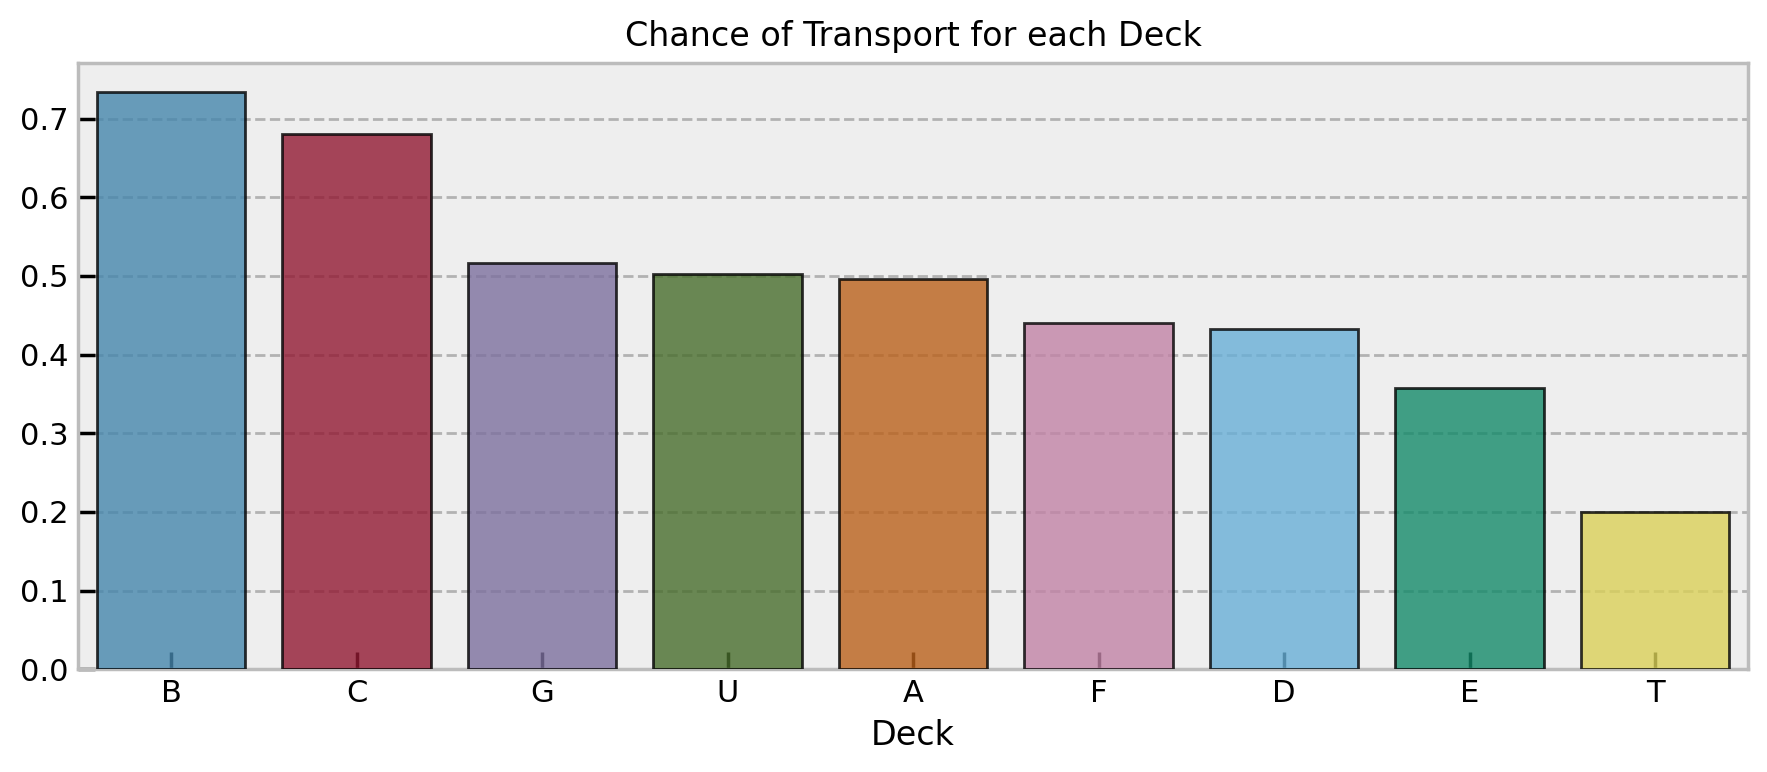

In [735]:
deck_mean_transport = train_df \
    .groupby('Deck')['Transported']\
    .mean() \
    .sort_values(ascending=False) \
    .to_frame().T

fig = plt.figure(figsize=(9, 4))
sns.barplot(deck_mean_transport, edgecolor='black', zorder=3, alpha=0.8)
plt.title('Chance of Transport for each Deck')
plt.tight_layout()
plt.show()

In [736]:
train_df['PassengerGroup'] = train_df['PassengerId'].str.extract(r'([0-9]*(?=_))').astype(int)
train_df['GroupSize'] = train_df.groupby('PassengerGroup')['PassengerId'].transform('count')

test_df['PassengerGroup'] = test_df['PassengerId'].str.extract(r'([0-9]*(?=_))').astype(int)
test_df['GroupSize'] = test_df.groupby('PassengerGroup')['PassengerId'].transform('count')

print(f"""
Extracted PassengerGroup from PassengerId and calculated group sizes:
- Total unique groups in train: {train_df['PassengerGroup'].nunique()}
- Total unique groups in test: {test_df['PassengerGroup'].nunique()}
- Avg group size in train: {train_df['GroupSize'].mean():.2f}
- Avg group size in test: {test_df['GroupSize'].mean():.2f}
""")


Extracted PassengerGroup from PassengerId and calculated group sizes:
- Total unique groups in train: 6217
- Total unique groups in test: 3063
- Avg group size in train: 2.04
- Avg group size in test: 2.00



In [737]:
train_df = pd.get_dummies(
    train_df,
    dtype=int,
    columns=['Deck', 'Side', 'Destination', 'HomePlanet'],
    prefix_sep={'Deck': '-', 'Side': '-', 'Destination': '-', 'HomePlanet': '-'}
    )

test_df = pd.get_dummies(
    test_df,
    dtype=int,
    columns=['Deck', 'Side', 'Destination', 'HomePlanet'],
    prefix_sep={'Deck': '-', 'Side': '-', 'Destination': '-', 'HomePlanet': '-'}
    )

In [742]:
train_predictors = train_df.drop(['PassengerId', 'Transported'], axis=1).to_numpy()
test_predictors = test_df.drop('PassengerId', axis=1).to_numpy()
train_target = train_df['Transported'].to_numpy()

print(f"""
X.shape: {train_predictors.shape}, X_test.shape: {test_predictors.shape}
y.shape: {train_target.shape}
""")


X.shape: (8693, 31), X_test.shape: (4277, 31)
y.shape: (8693,)



In [743]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

scalers = {
    'StandardScaler': StandardScaler, 
    'Normalizer': Normalizer, 
    'MinMaxScaler': MinMaxScaler, 
    'RobustScaler': RobustScaler
}
for name, feature_scaler in scalers.items():

    scelar_selector_pipe = Pipeline([
        ('scaler', feature_scaler()),
        ('model', LogisticRegression(random_state=SEED))
    ]) \
    .fit(train_predictors, train_target)

    preds = scelar_selector_pipe.predict(train_predictors)
    acc = accuracy_score(train_target, preds)
    prec = precision_score(train_target, preds)
    recl = recall_score(train_target, preds)
    f1 = f1_score(train_target, preds)

    print(f"""| {name:<14} | Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {recl:.4f} | F1: {f1:.4f} |""")

| StandardScaler | Accuracy: 0.7776 | Precision: 0.7702 | Recall: 0.7960 | F1: 0.7829 |
| Normalizer     | Accuracy: 0.5483 | Precision: 0.5287 | Recall: 0.9493 | F1: 0.6791 |
| MinMaxScaler   | Accuracy: 0.7780 | Precision: 0.7710 | Recall: 0.7953 | F1: 0.7830 |
| RobustScaler   | Accuracy: 0.7780 | Precision: 0.7706 | Recall: 0.7963 | F1: 0.7832 |


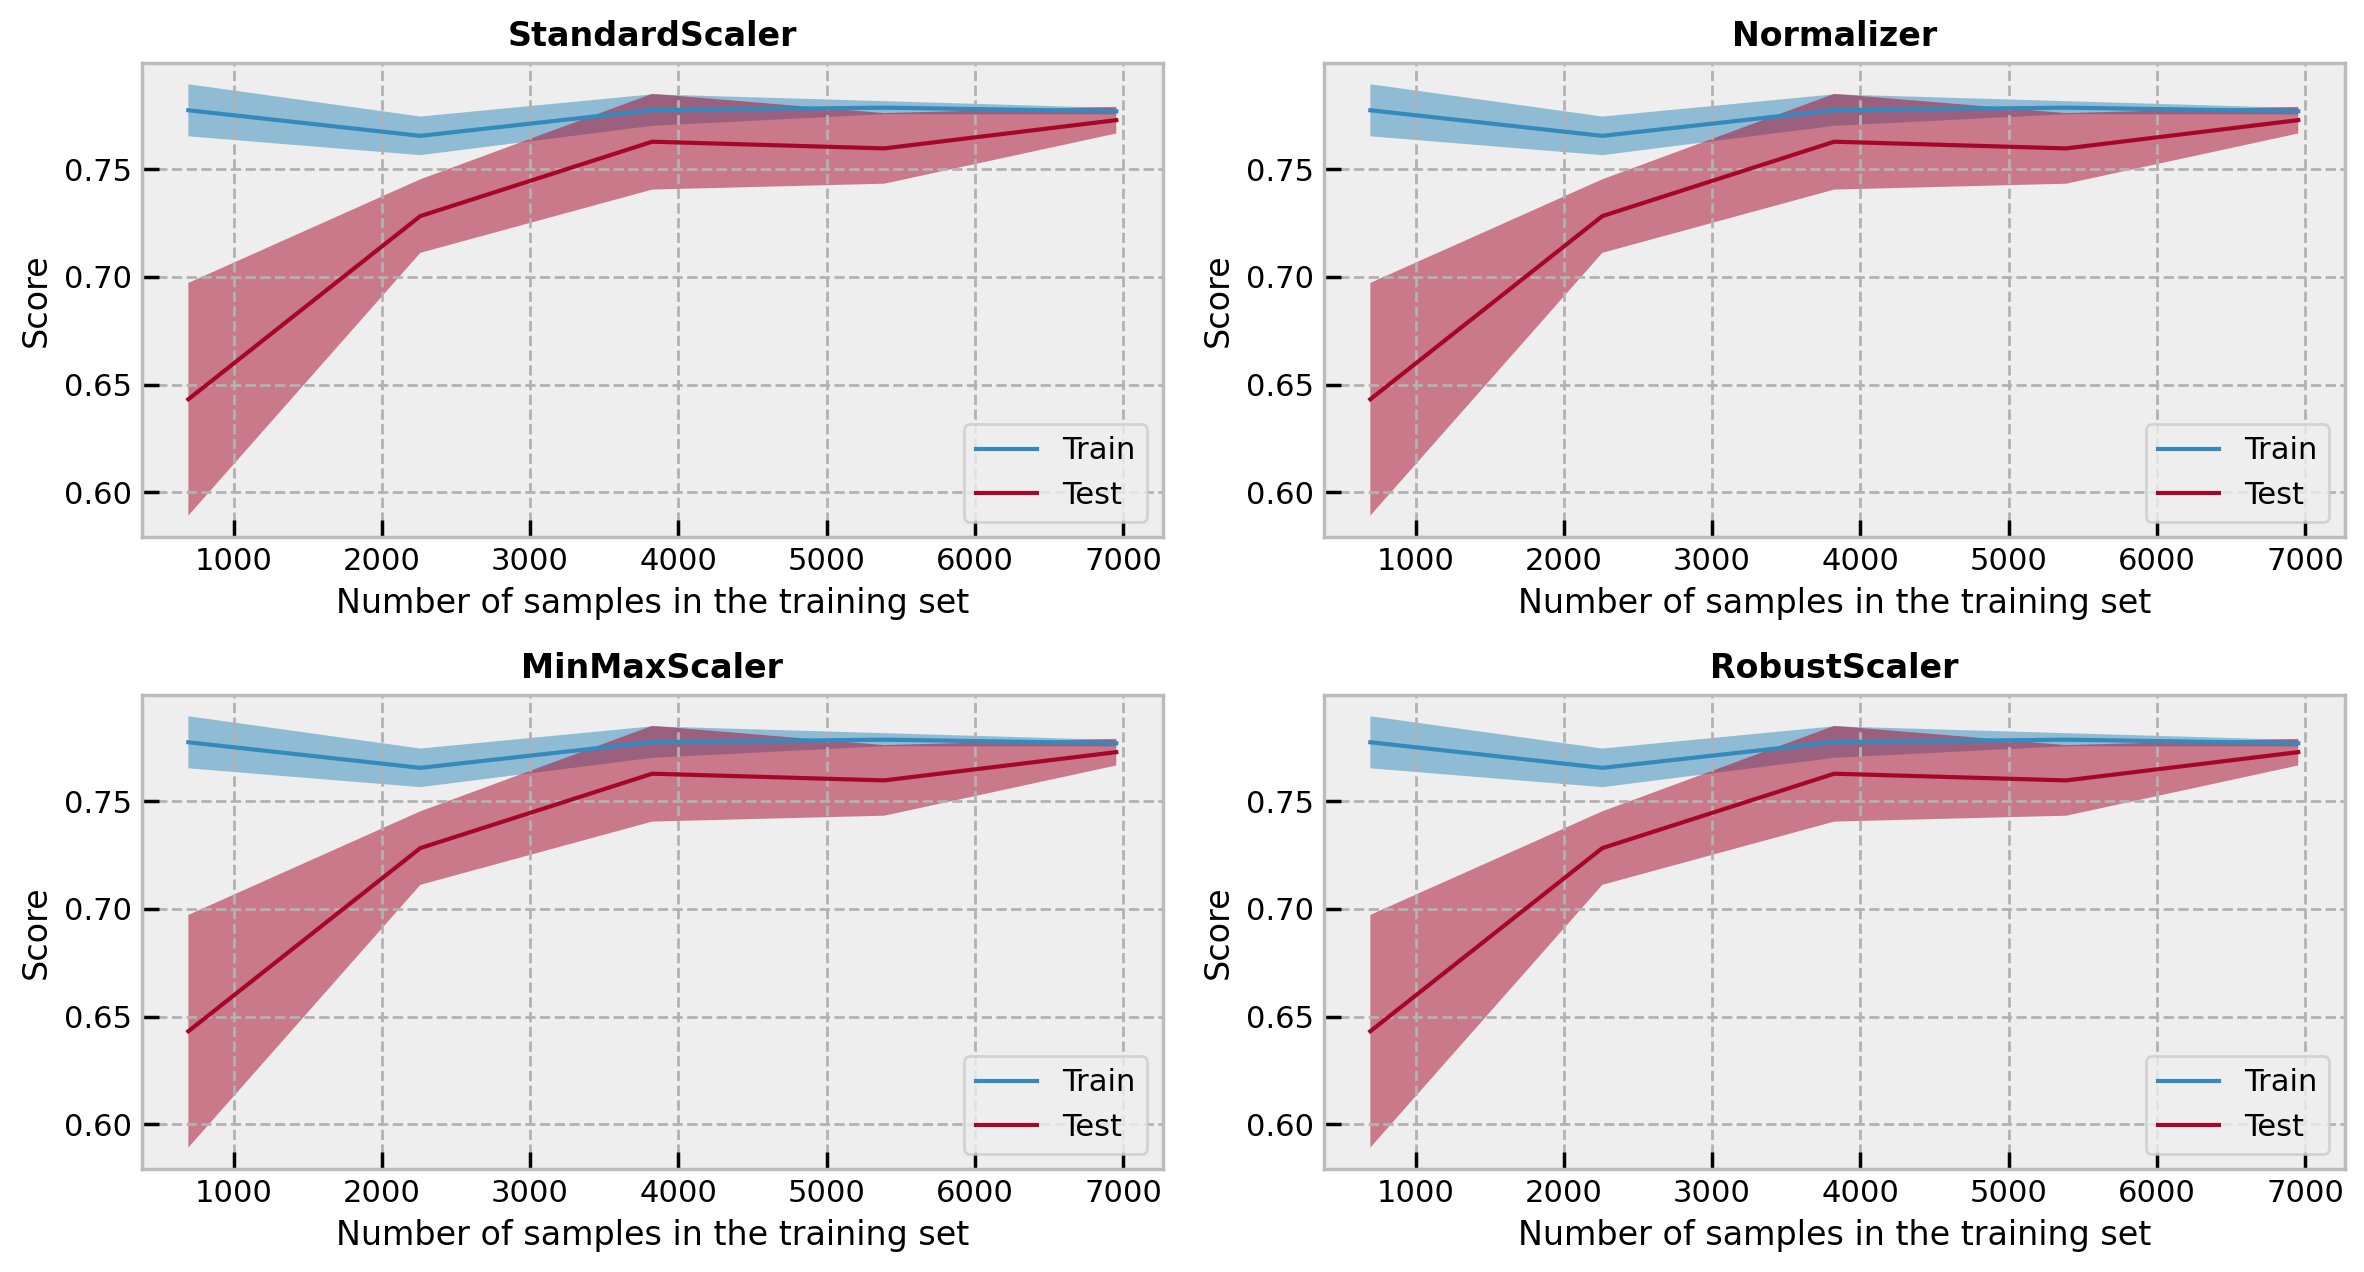

In [744]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

# plot learning curves for different train subset choise
fig, axes = plt.subplots(2, 2, figsize=(12, 6.5))
for ax, scaler in zip(axes.flatten(), scalers):
    test_pipe = Pipeline([
            ('scaler', scalers[scaler]()),
            ('model', LogisticRegression(random_state=SEED))
        ]) \
        .fit(train_predictors, train_target)

    train_size_abs, train_scores, test_scores = learning_curve(scelar_selector_pipe, train_predictors, train_target)
    display = LearningCurveDisplay(
        train_sizes=train_size_abs, 
        train_scores=train_scores, 
        test_scores=test_scores, 
        score_name="Score"
        )
    display.plot(ax=ax)
    ax.set_title(scaler, weight='bold')

plt.tight_layout()
plt.show()

In [745]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_predictors, train_target, test_size=.15, shuffle=True)
print(f"""
| X_train.shape: {X_train.shape} | X_val.shape: {X_val.shape} | X_test.shape: {test_predictors.shape}
| -----------------------------------------------------------------------------
| y_train.shape: {y_train.shape} | y_val.shape: {y_val.shape}
""")


| X_train.shape: (7389, 31) | X_val.shape: (1304, 31) | X_test.shape: (4277, 31)
| -----------------------------------------------------------------------------
| y_train.shape: (7389,) | y_val.shape: (1304,)



In [746]:
pipe_scaler = RobustScaler
pipe_model = LogisticRegression

pipe = Pipeline([
    ('scaler', pipe_scaler()),
    ('model', pipe_model(random_state=SEED))
])\
    .fit(X_train, y_train)

preds = pipe.predict(X_val)
acc = accuracy_score(y_val, preds)
prec = precision_score(y_val, preds)
recl = recall_score(y_val, preds)
f1 = f1_score(y_val, preds)

print(f"""| Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {recl:.4f} | F1: {f1:.4f} |""")

| Accuracy: 0.7692 | Precision: 0.7544 | Recall: 0.7929 | F1: 0.7732 |


In [759]:
y_test = pipe.predict(test_predictors)

submission_tuple = zip(test_df['PassengerId'], y_test)
submission = pd.DataFrame(submission_tuple, columns=['PassengerId', 'Transported'])
submission.to_csv('predictions.csv', index=False)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
